In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
causes=pd.read_csv('20222703 Causes Of Death Clean Output.csv')
kz=causes[causes['Entity']=='Kazakhstan']
usa=causes[causes['Entity']=='United States']
rus=causes[causes['Entity']=='Russia']
kz.fillna(0, inplace=True)
usa.fillna(0, inplace=True)
rus.fillna(0, inplace=True)

causes_names=causes['Causes name'].unique()
kz_causes_rank={}
for x in causes_names:
    num=sum(kz[kz['Causes name']==x]['Death Numbers'])
    kz_causes_rank.update({num:x})
kz_causes_rank=dict(sorted(kz_causes_rank.items(),reverse=True))

usa_causes_rank={}
for x in causes_names:
    num=sum(usa[usa['Causes name']==x]['Death Numbers'])
    if x=='Number of executions (Amnesty International)':
        pass
    else:
        usa_causes_rank.update({num:x})
usa_causes_rank=dict(sorted(usa_causes_rank.items(),reverse=True))

rus_causes_rank={}
for x in causes_names:
    num=sum(rus[rus['Causes name']==x]['Death Numbers'])
    rus_causes_rank.update({num:x})
rus_causes_rank=dict(sorted(rus_causes_rank.items(),reverse=True))

In [3]:
causes.head()

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
0,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007.0
1,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,15925.0,Afghanistan,AFG,2007.0
2,"Fire, heat, and hot substances,""Deaths - Fire,...",NaN,NaN,NaN,NaN,NaN
3,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,393.0,Afghanistan,AFG,2007.0
4,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,2127.0,Afghanistan,AFG,2007.0


In [4]:
kz_new=pd.DataFrame(kz_causes_rank,index=kz_causes_rank.values(),columns=['Death Numbers'])
kz_new['Death Numbers']=kz_causes_rank.keys()


usa_new=pd.DataFrame(usa_causes_rank,index=usa_causes_rank.values(),columns=['Death Numbers'])
usa_new['Death Numbers']=usa_causes_rank.keys()

rus_new=pd.DataFrame(rus_causes_rank,index=rus_causes_rank.values(),columns=['Death Numbers'])
rus_new['Death Numbers']=rus_causes_rank.keys()
rus_new

,Death Numbers
Cardiovascular diseases,33903781.0
Neoplasms,9079313.0
Digestive diseases,2398456.0
Self-harm,1793855.0
Chronic respiratory diseases,1518195.0
Cirrhosis and other chronic liver diseases,1233608.0
Interpersonal violence,1215179.0
Alcohol use disorders,1194672.0
Lower respiratory infections,1113475.0
Road injuries,1067226.0


In [5]:
df=pd.DataFrame(data=usa_causes_rank.values(),columns=['Kazakhstan'])
df['Kazakhstan']=kz_causes_rank.values()
df['Russia']=rus_causes_rank.values()
df['United States']=usa_causes_rank.values()
df

,Kazakhstan,Russia,United States
0,Cardiovascular diseases,Cardiovascular diseases,Cardiovascular diseases
1,Neoplasms,Neoplasms,Neoplasms
2,Digestive diseases,Digestive diseases,Chronic respiratory diseases
3,Chronic respiratory diseases,Self-harm,Alzheimer's disease and other dementias
4,Cirrhosis and other chronic liver diseases,Chronic respiratory diseases,Digestive diseases
5,Self-harm,Cirrhosis and other chronic liver diseases,Lower respiratory infections
6,Lower respiratory infections,Interpersonal violence,Diabetes mellitus
7,Road injuries,Alcohol use disorders,Chronic kidney disease
8,Tuberculosis,Lower respiratory infections,Cirrhosis and other chronic liver diseases
9,Neonatal disorders,Road injuries,Road injuries


In [6]:
df1=pd.DataFrame(data=kz_new,index=range(31),columns=['Kazakhstan Causes','Kazakhstan Death Numbers'])
df1['Kazakhstan Causes']=kz_causes_rank.values()
df1['Kazakhstan Death Numbers']=kz_causes_rank.keys()
df1['Russia Causes']=rus_causes_rank.values()
df1['Russia Death Numbers']=rus_causes_rank.keys()
df1['United States Causes']=usa_causes_rank.values()
df1['United States Death Numbers']=usa_causes_rank.keys()

df1=df1[:15]
df1

,Kazakhstan Causes,Kazakhstan Death Numbers,Russia Causes,Russia Death Numbers,United States Causes,United States Death Numbers
0,Cardiovascular diseases,2232449.0,Cardiovascular diseases,33903781.0,Cardiovascular diseases,26438346.0
1,Neoplasms,648639.0,Neoplasms,9079313.0,Neoplasms,18905315.0
2,Digestive diseases,228739.0,Digestive diseases,2398456.0,Chronic respiratory diseases,4949052.0
3,Chronic respiratory diseases,224600.0,Self-harm,1793855.0,Alzheimer's disease and other dementias,3302609.0
4,Cirrhosis and other chronic liver diseases,152588.0,Chronic respiratory diseases,1518195.0,Digestive diseases,3026943.0
5,Self-harm,149638.0,Cirrhosis and other chronic liver diseases,1233608.0,Lower respiratory infections,2248625.0
6,Lower respiratory infections,139520.0,Interpersonal violence,1215179.0,Diabetes mellitus,2030632.0
7,Road injuries,103782.0,Alcohol use disorders,1194672.0,Chronic kidney disease,2018497.0
8,Tuberculosis,85570.0,Lower respiratory infections,1113475.0,Cirrhosis and other chronic liver diseases,1514325.0
9,Neonatal disorders,77170.0,Road injuries,1067226.0,Road injuries,1359744.0


In [7]:
df2=pd.DataFrame(data=kz_causes_rank,index=kz_causes_rank.values(),columns=['Kazakhstan','Russia','United States'])

df2['Kazakhstan']=kz_new['Death Numbers']
df2['Russia']=rus_new['Death Numbers']
df2['United States']=usa_new['Death Numbers']

df2

,Kazakhstan,Russia,United States
Cardiovascular diseases,2232449.0,33903781.0,26438346.0
Neoplasms,648639.0,9079313.0,18905315.0
Digestive diseases,228739.0,2398456.0,3026943.0
Chronic respiratory diseases,224600.0,1518195.0,4949052.0
Cirrhosis and other chronic liver diseases,152588.0,1233608.0,1514325.0
Self-harm,149638.0,1793855.0,1168886.0
Lower respiratory infections,139520.0,1113475.0,2248625.0
Road injuries,103782.0,1067226.0,1359744.0
Tuberculosis,85570.0,529853.0,38127.0
Neonatal disorders,77170.0,237923.0,429516.0


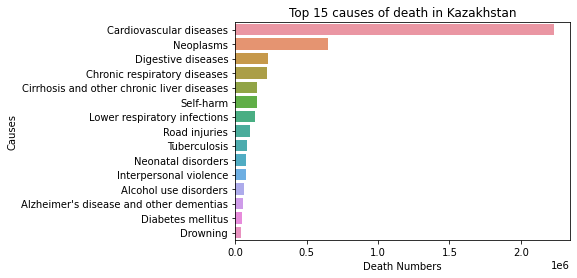

In [8]:
#seaborn barplot that shows the top 15 causes of death in Kazakhstan correscponding to the numbers of deaths caused
sns.barplot(x='Kazakhstan Death Numbers',y='Kazakhstan Causes',data=df1)
plt.ylabel('Causes')
plt.xlabel('Death Numbers')
plt.title('Top 15 causes of death in Kazakhstan')
plt.show()

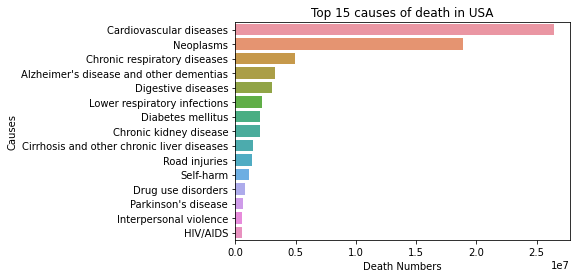

In [9]:
#seaborn barplot that shows the top 15 causes of death in USA correscponding to the numbers of deaths caused
sns.barplot(x='United States Death Numbers',y='United States Causes',data=df1)
plt.ylabel('Causes')
plt.xlabel('Death Numbers')
plt.title('Top 15 causes of death in USA')
plt.show()

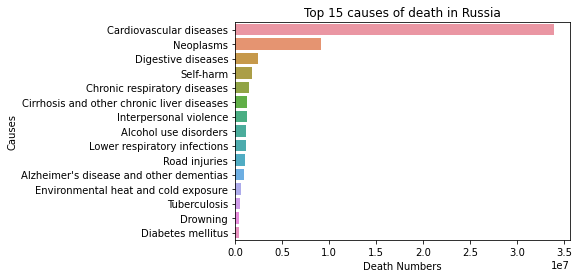

In [10]:
#seaborn barplot that shows the top 15 causes of death in Russia correscponding to the numbers of deaths caused
sns.barplot(x='Russia Death Numbers',y='Russia Causes',data=df1)
plt.ylabel('Causes')
plt.xlabel('Death Numbers')
plt.title('Top 15 causes of death in Russia')

plt.show()

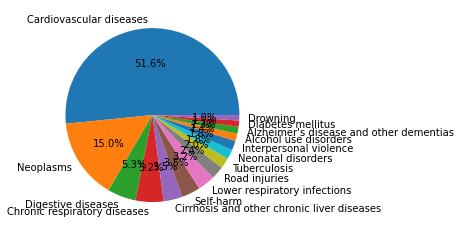

In [11]:
#pie chart that shows the percentage of deaths caused by each reason from Kazakhstan's top 15
plt.pie(list(df1['Kazakhstan Death Numbers']),labels=list(df1['Kazakhstan Causes']),autopct='%1.1f%%')
plt.show()

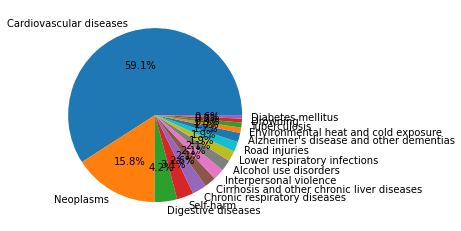

In [12]:
#pie chart that shows the percentage of deaths caused by each reason from Russia's top 15
plt.pie(list(df1['Russia Death Numbers']),labels=list(df1['Russia Causes']),autopct='%1.1f%%')
plt.show()

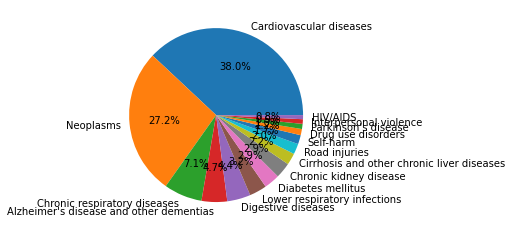

In [13]:
#pie chart that shows the percentage of deaths caused by each reason from USA's top 15
plt.pie(list(df1['United States Death Numbers']),labels=list(df1['United States Causes']),autopct='%1.1f%%')
plt.show()

In [14]:
!pip install folium

In [15]:
#map that shows the death numbers of each country
import folium
countries = causes.groupby(['Entity'])
dataframe = countries.sum()
center = [35.762887375145795, 84.08313219586536]

m = folium.Map(location = center, zoom_start = 2,
    max_bounds = True,
    min_zoom = 1, min_lat = -84,
    max_lat = 84, min_lon = -175, max_lon = 187)

url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
country_geo = f"{url}/world-countries.json"

folium.Choropleth(
    geo_data = country_geo,
    data = dataframe,
    columns = (dataframe.index, 'Death Numbers'),
    key_on = 'properties.name',
    fill_color = "YlOrRd",
    fill_opacity = 0.7,
    line_opacity = 0.5,
   ).add_to(m)

folium.LayerControl().add_to(m)
m

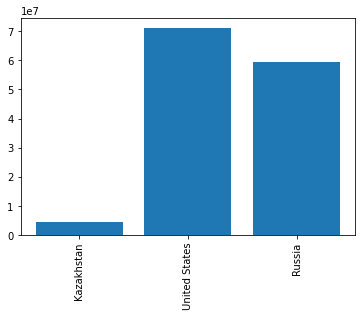

In [16]:
#death numbers of each country because of their own top 15 death causes
plt.xticks(range(3),['Kazakhstan','United States','Russia'],rotation='vertical')
plt.bar(range(3), [sum(df2['Kazakhstan']),sum(df2['United States']),sum(df2['Russia'])])
plt.show()

In [17]:
uni_stud=pd.read_excel('5.2. Численность студентов организаций высшего образования.xls',index_col=[0])
uni_stud.replace(to_replace='...',value=0,inplace=True)
uni_stud

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Республика Казахстан,440715,514738,597489,658106,747104,775762,768442,717053,633814,610264,...,527226,477387,459369,477074,496209,542458,604345,576557,575511,578237
Абай,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18316
Акмолинская,11516,16181,19148,22061,24598,27486,26836,19030,19151,17609,...,13787,10289,9267,8455,9441,10166,11994,12111,12044,10908
Актюбинская,26172,28801,31259,29433,35037,37740,33031,24808,23199,24335,...,23821,20825,20336,21004,21829,24459,27695,27090,24909,22774
Алматинская,5641,6755,8788,10976,12847,13275,12496,11882,10778,10494,...,10701,9724,9051,9422,9342,10410,11201,10753,11572,7303
Атырауская,16238,19861,22070,23261,24479,23196,22030,20803,17652,15884,...,11347,10552,10014,11012,12046,13186,13177,12407,11775,10117
Западно-Казахстанская,15290,16566,23784,27286,30378,31172,30168,27902,26047,25985,...,25517,28369,26856,29919,31392,30663,31705,27121,26889,25427
Жамбылская,22262,23749,30300,30437,35788,37274,35213,33159,27166,26195,...,26805,19580,18950,19662,20874,22665,25103,24953,22443,19632
Жетису,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4400
Карагандинская,52308,59146,63009,67909,74013,71809,67102,62384,55905,56308,...,46449,41123,36976,41738,42629,44549,43462,41650,41163,38079


In [18]:
college_stud=pd.read_excel('4.2. Численность студентов ТИПО.xls',index_col=[0])
college_stud.replace(to_replace='...',value=0,inplace=True)

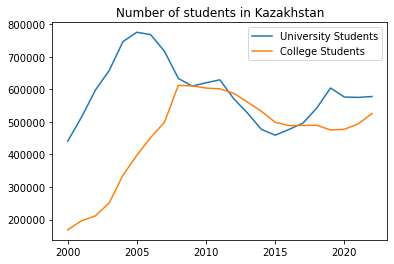

In [19]:
plt.plot(uni_stud.iloc[0], label='University Students')
plt.plot(college_stud.iloc[0],label='College Students')
plt.legend()
plt.title('Number of students in Kazakhstan')
plt.show()

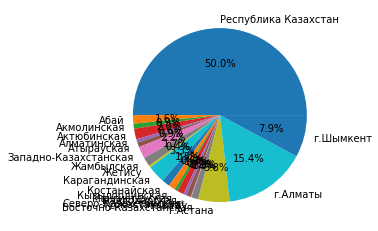

In [20]:
plt.pie(list(uni_stud[2022]),labels=list(uni_stud.index),autopct='%1.1f%%')
plt.show()

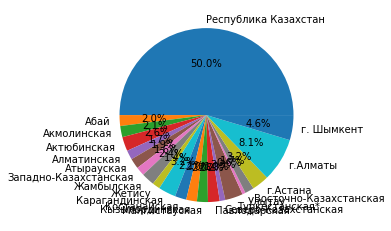

In [21]:
plt.pie(list(college_stud[2022]),labels=list(college_stud.index),autopct='%1.1f%%')
plt.show()